<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/Basic_Skills/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Tutorial

Pytorch는 Tensorflow와 함께 가장 널리 사용되는 딥러닝 프레임워크로, New York 대학교와 Facebook이 공동으로 만들었다.

Lua 언어로 된 Torch를 Python 기반으로 변경한 것이 Pytorch이며, 특유의 유연성 덕분에 연구 분야에서 주로 사용된다.

## Pytorch Basic

### Pytorch import

In [2]:
import torch
print(torch.__version__)

1.13.1+cu116


### Pytorch 맛보기

In [3]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# MNIST dataset 받기

# 학습데이터 from torchvision.datasets
train_set = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor() # Convert a PIL Image or numpy.ndarray to tensor
)

# 테스트데이터 from torchvision.datasets
test_set = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# DataLoader 설정
batch_size = 64
num_workers = 2 # 사용 CPU 코어 개수

train_dataloader = DataLoader(train_set, batch_size=batch_size, num_workers=num_workers)
test_dataloader = DataLoader(test_set, batch_size=batch_size, num_workers=num_workers)

for X, y in test_dataloader:
  print(f'Shape of X [N,C,H,W]: {X.shape}') # batch_size, Channel(gray=1), Height, Width
  print(f'Shape of y: {y.shape}')
  break

Shape of X [N,C,H,W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


In [9]:
# device 설정
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Current device: {device}')

Current device: cuda:0


In [ ]:
# Model 정의: class로 정의 권장

num_class = 10 # 예측 값 class 수

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Dropout(0.2), # default 0.5
        nn.Linear(128, num_class)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)

    return logits

In [ ]:
# device(GPU)로 Model 옮기기기
model = MyModel().to(device)
print(model)

MyModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Loss 함수 & Optimizer 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

In [ ]:
# training 함수
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # prediction error 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파: 가중치 업데이트
    optimizer.zero_grad() # 이전 gradients 삭제
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f'loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')

In [ ]:
# testing 함수
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad(): # gradient 전파 방지
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f'test error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n')

In [ ]:
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\n')
  print('='*20)

  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print('Done!')

Epoch 1

loss: 2.324296  [    0/60000]
loss: 0.452723  [ 6400/60000]
loss: 0.326971  [12800/60000]
loss: 0.381245  [19200/60000]
loss: 0.240291  [25600/60000]
loss: 0.357431  [32000/60000]
loss: 0.172972  [38400/60000]
loss: 0.357038  [44800/60000]
loss: 0.300387  [51200/60000]
loss: 0.320124  [57600/60000]
test error: 
 Accuracy: 94.0%, Avg loss: 0.199451

Epoch 2

loss: 0.135547  [    0/60000]
loss: 0.181842  [ 6400/60000]
loss: 0.102089  [12800/60000]
loss: 0.180370  [19200/60000]
loss: 0.144814  [25600/60000]
loss: 0.247847  [32000/60000]
loss: 0.062815  [38400/60000]
loss: 0.236491  [44800/60000]
loss: 0.162954  [51200/60000]
loss: 0.218489  [57600/60000]
test error: 
 Accuracy: 95.8%, Avg loss: 0.138569

Epoch 3

loss: 0.076635  [    0/60000]
loss: 0.115602  [ 6400/60000]
loss: 0.079982  [12800/60000]
loss: 0.081791  [19200/60000]
loss: 0.102069  [25600/60000]
loss: 0.172192  [32000/60000]
loss: 0.036783  [38400/60000]
loss: 0.169688  [44800/60000]
loss: 0.120910  [51200/60000]
l

In [4]:
# test with own image
from google.colab import files
upload = files.upload()

Saving image.png to image.png


In [5]:
import os
from PIL import Image

for fn in upload.keys():
  print(f'User uploaded file "{fn}" with length {len(upload[fn])} bytes')

User uploaded file "image.png" with length 226 bytes


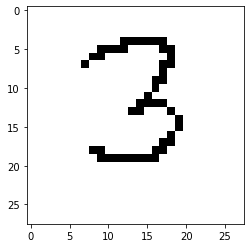

In [6]:
from math import e
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')

cur_img = Image.open(img_path)
plt.imshow(cur_img)
plt.show()

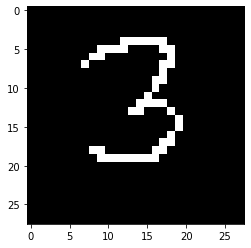

In [7]:
# resize
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img)

# gray scale
try:
  image = np.mean(image, axis=-1)
except:
  pass

# 색 반전
image = np.abs(255-image)

# scaling
image = image.astype(np.float32)/255.

plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
# array to tensor
image = torch.as_tensor(image).to(device).reshape(1,1,28,28)

In [ ]:
# test
model.eval()
predict = model(image)
print(f'Model Predcition: {predict.argmax().item()}')

Model Predcition: 3


## Tensor

텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수 자료구조로, PyTorch에서 기본적으로 사용하는 데이터타입이다.

모델의 입력(input) 및 출력(output)뿐만 아니라 매개변수(parameter) 또한 부호화(encode)한다.

In [20]:
# list로부터 tensor 생성하기
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [21]:
# numpy array로부터 tensor 생성하기
np_array = np.array(data)
x_np_1 = torch.tensor(np_array) # copy 생성: tensor의 변화가 원본에 영향 X
print(x_np_1)

x_np_2 = torch.as_tensor(np_array) # view 생성: tensor의 변화가 원본에 영향
print(x_np_2)

x_np_3 = torch.from_numpy(np_array) # view 생성
print(x_np_3)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])


In [22]:
x_np_1[0,0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]])
[[1 2]
 [3 4]]


`torch.tensor()`를 이용해 만들어진 tensor는 copy를 만드는 형식이므로 원본에 영향을 주지 않는다.

이 경우, 잘못 사용하면 메모리 낭비를 불러일으킬 수 있으므로 주의할 것

In [23]:
x_np_2[0,0] = 3
print(x_np_2)
print(np_array)

tensor([[3, 2],
        [3, 4]])
[[3 2]
 [3 4]]


그러나, `torch.as_tensor()`를 이용해 만들어진 tensor는 원본의 view 역할을 하게되므로 tensor의 변화가 원본에 영향을 미친다.

In [24]:
x_np_3[0,0] = 6
print(x_np_3)
print(np_array)

tensor([[6, 2],
        [3, 4]])
[[6 2]
 [3 4]]


`torch.from_numpy()` 또한 마찬가지.

In [25]:
# tensor를 numpy array로 바꾸기
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [27]:
# tensor 유관 torch 함수
# numpy의 함수들과 매우 유사
a = torch.zeros(2,3) # np.zeros(2,3)
b = torch.ones(2,3) # np.ones(2,3)
c = torch.full((2,3), 2) # np.full((2,3), 2)
d = torch.empty(2,3) # np.empty(2,3)
print(a)
print(b)
print(c)
print(d)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[1.9714e-36, 0.0000e+00, 1.0379e-40],
        [1.8750e+00, 0.0000e+00, 1.8750e+00]])


In [31]:
e = torch.zeros_like(a) # np.zeros_like(a)
f = torch.ones_like(b) # np.ones_like(b)
g = torch.full_like(c, 2) # np.full_like(c, 2)
h = torch.empty_like(c) # np.empty_like(c)
print(e)
print(f)
print(g)
print(h)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[           69709120, 4575657222473777152, 4575657222473777152],
        [                  0,                   0,                   0]])


In [32]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [33]:
j = torch.arange(10)
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [34]:
k = torch.rand(2,2)
l = torch.randn(2,2)
print(k)
print(l)

tensor([[0.7573, 0.2546],
        [0.0294, 0.0689]])
tensor([[-1.3967,  0.8505],
        [ 0.3481, -0.1623]])


### Tensor의 속성

shape, dtype, device

In [36]:
tensor = torch.randn(3,4)

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored: {tensor.device}') # 기본적으로 cpu

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored: cpu


In [38]:
# 속성 변경
tensor = tensor.reshape(4,3) # reshape는 상황마다 다르지만 view는 view를 생성
tensor = tensor.int()
tensor = tensor.to('cuda')

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored: {tensor.device}')

Shape of tensor: torch.Size([4, 3])
Datatype of tensor: torch.int32
Device tensor is stored: cuda:0


### Indexing & Slicing

In [39]:
a = torch.arange(1,13).reshape(3,4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [42]:
# indexing
print(a[1]) # row 1
print(a[:, 1]) # column 1
print(a[0, -1]) # row 0, last column

tensor([5, 6, 7, 8])
tensor([ 2,  6, 10])
tensor(4)


In [45]:
# slicing
print(a[0:-1]) # row 0 ~ 1
print(a[:2, 2:]) # row 0 ~ 1, column 2 ~ 3

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


### Transpose

In [49]:
a = torch.arange(16).reshape(2,2,4)
print(a)
print(a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]])
torch.Size([2, 2, 4])


In [51]:
b = a.transpose(1,2) # swap axis
print(b)
print(b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]])
torch.Size([2, 4, 2])


In [53]:
c = a.permute((2,0,1)) # 0, 1, 2 --> 2, 0, 1
print(c)
print(c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]])
torch.Size([4, 2, 2])


### Tensor 연산

In [55]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [56]:
print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x@y)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [57]:
print(torch.add(x,y))
print(torch.subtract(x,y))
print(torch.multiply(x,y))
print(torch.divide(x,y))
print(torch.matmul(x,y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [58]:
# in-place 연산
print(x.add(y))
print(x) # x가 변하지 않음
print(x.add_(y))
print(x) # x가 변함

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


add뿐 아니라 다양한 in-place 연산 존재

In [66]:
z = torch.arange(1, 11).reshape(2,5)
print(z, z.shape)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]]) torch.Size([2, 5])


In [67]:
# sum 연산
sum1 = torch.sum(z, axis=0) # axis가 사라지는 방향으로 연산
sum2 = torch.sum(z, axis=1)
sum3 = torch.sum(z, axis=-1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [68]:
a = torch.arange(24).reshape(4,6)
b = a.clone().detach() # copy
print(a)
print(b)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])


In [71]:
# cat
c = torch.cat([a,b], axis=0) # axis 0에 합침
d = torch.cat([a,b], axis=1) # axis 1에 합침
e = torch.cat([a,b], axis=-1)
print(c.shape)
print(d.shape)
print(e.shape)

torch.Size([8, 6])
torch.Size([4, 12])
torch.Size([4, 12])


In [75]:
# stack
f = torch.stack([a,b], axis=0) # axis 0 자리에 새로운 축 추가
g = torch.stack([a,b], axis=1) # axis 1 자리에 새로운 축 추가
h = torch.stack([a,b], axis=-1) # axis 마지막 자리에 새로운 축 추가
print(f.shape)
print(g.shape)
print(h.shape)

torch.Size([2, 4, 6])
torch.Size([4, 2, 6])
torch.Size([4, 6, 2])
